In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./craigslist-carstrucks-data/craigslistVehiclesFull_.csv')

In [3]:
df.keys()

Index(['Unnamed: 0', 'city', 'price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'lat',
       'long', 'county_fips', 'county_name', 'state_fips', 'state_code',
       'state_name', 'weather'],
      dtype='object')

In [20]:
df[['city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'state_name', 'weather']].dropna().head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state_name,weather
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,1FAFP55UO4G113464,fwd,full-size,sedan,grey,Iowa,47.0
140,reading,4480,2010.0,honda,insight,good,4 cylinders,hybrid,110000.0,clean,automatic,JHMZE2H76AS003740,fwd,mid-size,hatchback,silver,Pennsylvania,53.0
157,chambersburg,4500,2005.0,chevy,2500 hd,good,8 cylinders,gas,204000.0,clean,automatic,Xxxxxxxxxx,rwd,full-size,truck,grey,Pennsylvania,53.0
203,rapidcity,38500,2017.0,chevrolet,silverado,like new,8 cylinders,gas,44710.0,clean,automatic,3GCUKREC8HG363009,4wd,full-size,offroad,red,South Dakota,38.0
243,salina,800,2001.0,ford,escort zx2,fair,4 cylinders,gas,93400.0,clean,automatic,3FAFP11371R241940,fwd,compact,coupe,brown,Kansas,51.0


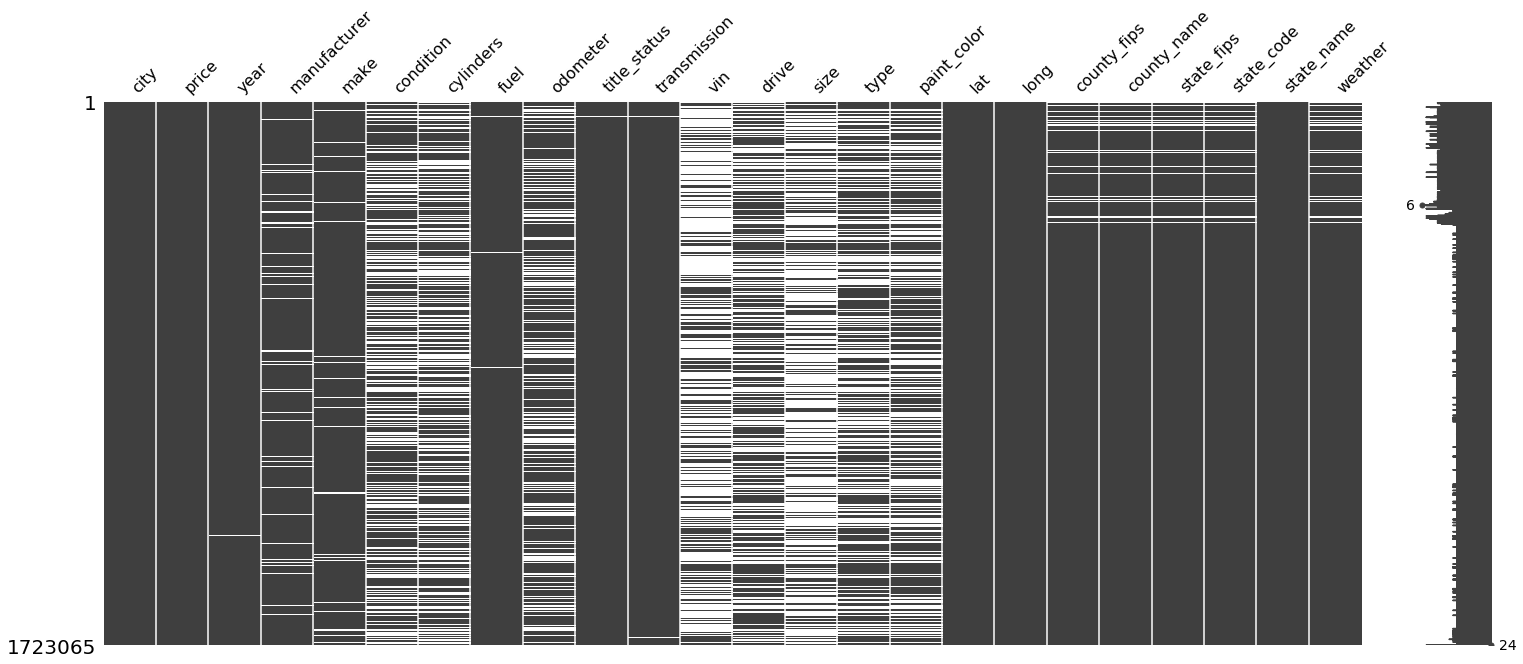

In [262]:
import missingno as msno
msno.matrix(df.drop(columns=["Unnamed: 0"]))

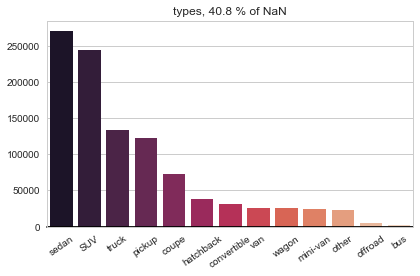

In [62]:
types_hist = df['type'].value_counts()
sns.set(style="whitegrid")
ax = sns.barplot(types_hist.index, types_hist.values, palette="rocket", )
ax.axhline(0, color="k", clip_on=False)
ax.set_xticklabels(types_hist.index, rotation=35)
ax.set_title("types, {} % of NaN".format(round(df['type'].isna().mean() * 100, 1)))
plt.tight_layout()
plt.savefig('types.png', dpi=200)

In [36]:
types_hist = df['type'].value_counts()
sns.set(style="whitegrid")
ax = sns.barplot(types_hist.index, types_hist.values, palette="rocket", )
ax.axhline(0, color="k", clip_on=False)
ax.set_xticklabels(types_hist.index, rotation=35)
ax.set_title("types, {} % of NaN".format(round(df['type'].isna().mean() * 100, 1)))
plt.tight_layout()
plt.savefig('types.png', dpi=200)

array([271265, 244675, 133715, 122900,  72562,  38254,  31134,  25351,
        25325,  24986,  22785,   5125,   2057])

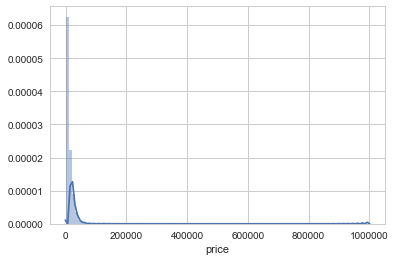

In [5]:
sns.set(style="whitegrid")
ax = sns.distplot(df['price'][df['price'] <= 1000000], bins=100)

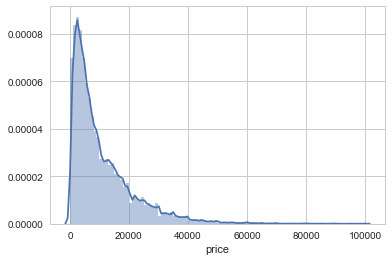

In [6]:
sns.set(style="whitegrid")
ax = sns.distplot(df['price'][df['price'] <= 100000], bins=100)

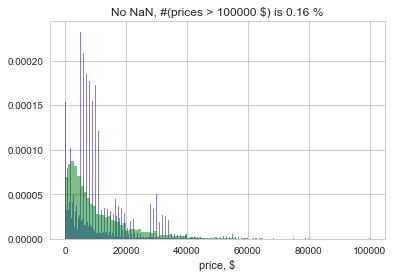

In [45]:
#sns.set(style="whitegrid")
plt.hist(df['price'][df['price'] <= 100000], bins=1000, color='b', alpha=0.5, normed=True)
plt.hist(df['price'][df['price'] <= 100000], bins=100, color='g', alpha=0.5, normed=True)
plt.xlabel('price, $')
plt.title('No NaN, #(prices > 100000 $) is {} %'.format(round((df['price'] > 100000).mean() * 100, 2)))
plt.savefig('prices_1.png', dpi=200)

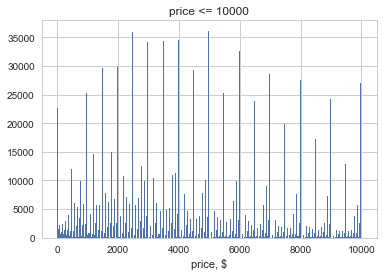

In [58]:
plt.hist(df['price'][df['price'] <= 10000], bins=300)
plt.title('price <= 10000')
plt.xlabel('price, $')
plt.savefig('prices_2.png', dpi=200)

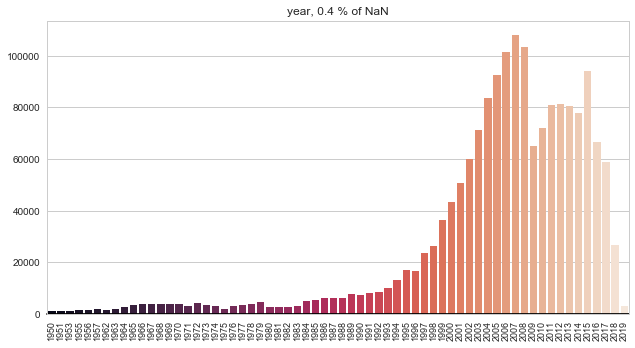

In [228]:
plt.figure(figsize=(9,5))
years_hist = df['year'].value_counts().sort_index(ascending=True)
years_hist = years_hist[years_hist > 1000].sort_index(ascending=True)
sns.set(style="whitegrid")
ax = sns.barplot(years_hist.index.astype(int), years_hist.values, palette="rocket", )
ax.axhline(0, color="k", clip_on=False)
ax.set_xticklabels(years_hist.index.astype(int), rotation=90, fontdict={'size': 9})
ax.set_title("year, {} % of NaN".format(round(df['year'].isna().mean() * 100, 1)))
plt.tight_layout()
plt.savefig('years_0.png', dpi=200)

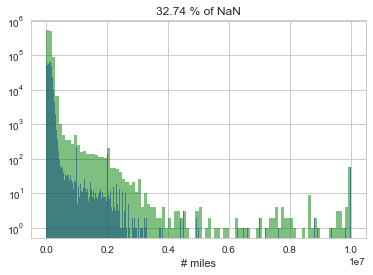

In [182]:
miles = df['odometer'][df['odometer'].notnull()]
#miles = miles[miles < 500000]
plt.hist(miles, bins=1000, color='b', alpha=0.5, log=True)
plt.hist(miles, bins=100, color='g', alpha=0.5, log=True)
plt.xlabel('# miles')
plt.title('{} % of NaN'.format(round((df['odometer'].isna()).mean() * 100, 2)))
plt.savefig('odo_1.png', dpi=200)

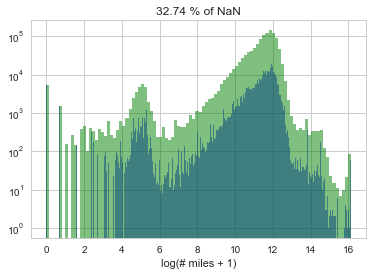

In [181]:
miles = df['odometer'][df['odometer'].notnull()]
#miles = miles[miles < 500000]
plt.hist(np.log(miles + 1), bins=1000, color='b', alpha=0.5, log=True)
plt.hist(np.log(miles + 1), bins=100, color='g', alpha=0.5, log=True)
plt.xlabel('log(# miles + 1)')
plt.title('{} % of NaN'.format(round((df['odometer'].isna()).mean() * 100, 2)))
plt.savefig('log_odo_1.png', dpi=200)

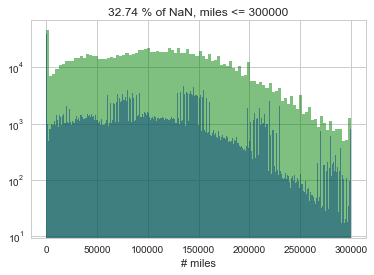

In [185]:
miles = df['odometer'][df['odometer'].notnull()]
miles = miles[miles <= 300000]
plt.hist(miles, bins=1000, color='b', alpha=0.5, log=True)
plt.hist(miles, bins=100, color='g', alpha=0.5, log=True)
plt.xlabel('# miles')
plt.title('{} % of NaN'.format(round((df['odometer'].isna()).mean() * 100, 2)) + ", miles <= 300000")
plt.savefig('odo_2.png', dpi=200)

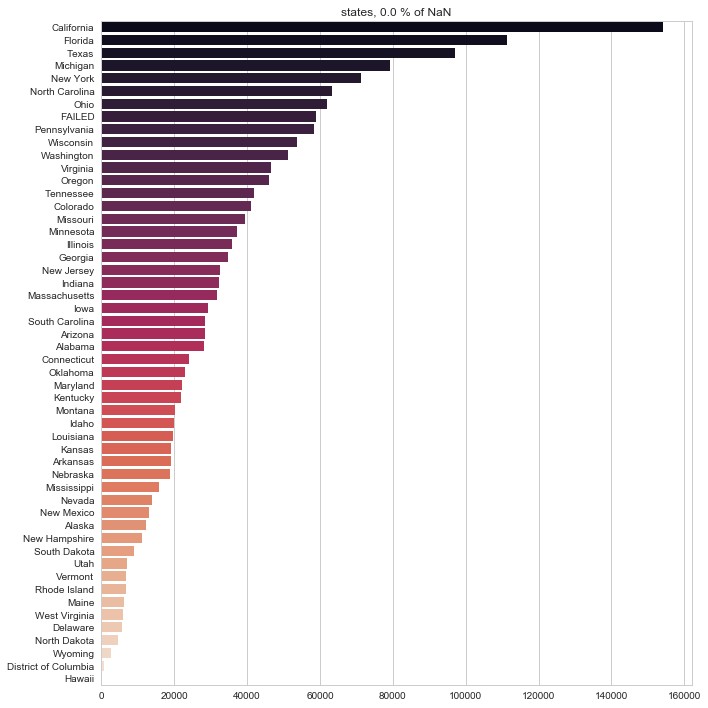

In [223]:
plt.figure(figsize=(10,10))
states_hist = df['state_name'].value_counts()
sns.set(style="whitegrid")
ax = sns.barplot(states_hist.values, states_hist.index, palette="rocket", orient='h')
#ax.axhline(0, color="k", clip_on=False)
#ax.set_xticklabels(states_hist.values, rotation=90)
ax.set_title("states, {} % of NaN".format(round(df['state_name'].isna().mean() * 100, 1)))
plt.tight_layout()
plt.savefig('states.png', dpi=200)

In [207]:
df.keys()

Index(['Unnamed: 0', 'city', 'price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'lat',
       'long', 'county_fips', 'county_name', 'state_fips', 'state_code',
       'state_name', 'weather'],
      dtype='object')

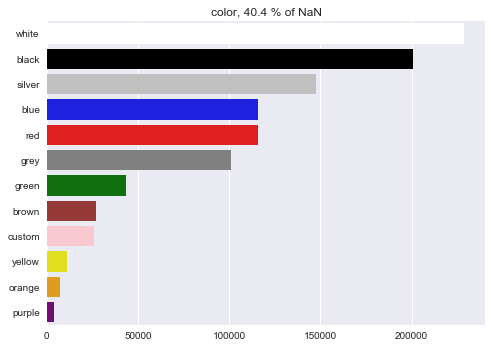

In [242]:
plt.figure(figsize=(7,5))
color_hist = df['paint_color'].value_counts()
sns.set()
clrs = list(color_hist.index)
clrs[8] = 'pink'
ax = sns.barplot(color_hist.values, color_hist.index, orient='h', palette=clrs)
#ax.axhline(0, color="k")
#ax.set_xticklabels(states_hist.values, rotation=90)
ax.set_title("color, {} % of NaN".format(round(df['paint_color'].isna().mean() * 100, 1)))
plt.tight_layout()
plt.savefig('colors.png', dpi=200)

In [253]:
from wordcloud import WordCloud

In [260]:
wc = WordCloud(width=500, height=500)
wc.generate_from_frequencies(df['manufacturer'].value_counts())
wc.to_image()
wc.to_file('manufacturer.png')

In [178]:
us_stats = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-population.csv')

In [179]:
us_stats = us_stats[us_stats.ages == 'total']
us_stats = us_stats[us_stats['year'] == us_stats['year'].max()]
us_stats = us_stats[us_stats['state/region'] != 'USA']
us_stats = us_stats.sort_values('state/region')
us_stats = us_stats[us_stats['state/region'] != 'PR']

In [31]:
import plotly.graph_objects as go

sn = df['state_code'].value_counts()
sn.sort_index(inplace=True)

fig = go.Figure(data=go.Choropleth(
    locations=sn.index, # Spatial coordinates
    z=sn.values / us_stats.population, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "",
))

fig.update_layout(
    title_text = 'Объявление на человека',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [183]:
sn = df['state_code'].value_counts()
sn.sort_index(inplace=True)

fig = go.Figure(data=go.Choropleth(
    locations=sn.index, # Spatial coordinates
    z=sn.values, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "%",
))

fig.update_layout(
    title_text = 'По проценту объявлений',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [98]:
us_colors = df[['state_code', 'paint_color']].groupby(['state_code']).agg(lambda x: x.value_counts().index[0] if abs(x.value_counts().values[0] - x.value_counts().values[1]) > 350 else 'bw')

In [99]:
us_colors[us_colors['paint_color'] == 'bw'] = 0.5
us_colors[us_colors['paint_color'] == 'white'] = 0.0
us_colors[us_colors['paint_color'] == 'black'] = 1.0

In [100]:
sn = df['state_code'].value_counts()
fig = go.Figure(data=go.Choropleth(
    locations=us_colors.index, # Spatial coordinates
    z=us_colors.values.flatten(), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "1 - black, 0 - white",
))

fig.update_layout(
    title_text = 'По цветам',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [107]:
us_type = df[['state_code', 'type']].groupby(['state_code']).agg(lambda x: x.value_counts().index[0])

In [109]:
us_type[us_type['type'] == 'sedan'] = 0.0
us_type[us_type['type'] == 'SUV'] = 0.5
us_type[us_type['type'] == 'truck'] = 1.0

In [114]:
sn = df['state_code'].value_counts()
fig = go.Figure(data=go.Choropleth(
    locations=us_type.index, # Spatial coordinates
    z=us_type.values.flatten(), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "1 - truck, 0 - sedan, 0.5 - SUV",
))

fig.update_layout(
    title_text = 'По типам',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [216]:
us_year = df[['state_code', 'year']].groupby(['state_code']).agg(lambda x: len(x[(x>= 2000)*(x<=2200)]))



/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead



In [217]:
us_year.sort_index(inplace=True)
us_year = us_year.drop('HI')

In [218]:
fig = go.Figure(data=go.Choropleth(
    locations=us_year.index, # Spatial coordinates
    z=us_year.values.flatten() / sn.drop('HI').values, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "1 - truck, 0 - sedan, 0.5 - SUV",
))

fig.update_layout(
    title_text = 'По типам',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [252]:
us_fuel = df[['state_code', 'fuel']].groupby(['state_code']).agg(lambda x: len(x[x == 'electric']))


In [255]:
us_fuel.sort_index(inplace=True)
fig = go.Figure(data=go.Choropleth(
    locations=us_fuel.index, # Spatial coordinates
    z=us_fuel.values.flatten() / sn.values, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Электромобиль на объявление",
))

fig.update_layout(
    title_text = 'Электромобили',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [299]:
mat = []
for c in df.paint_color.dropna().unique():
    mat_ = []
    for t in df.type.dropna().unique():
        mat_.append(((df.paint_color == c) * (df.type == t)).sum())
    mat.append(mat_)

/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead



In [300]:
mat = np.array(mat)

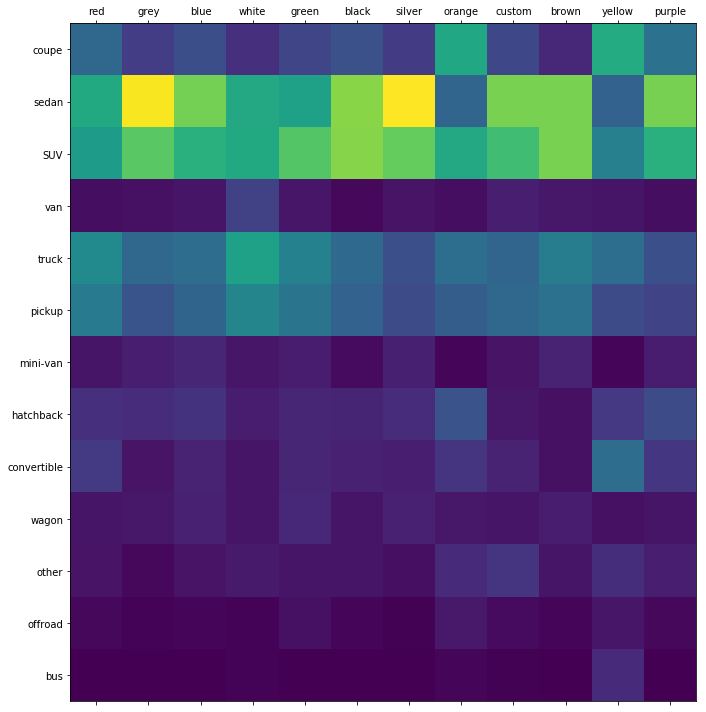

In [322]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow((mat / mat.sum(axis=1)[:, np.newaxis]).T)
x_ticks = list(df.paint_color.dropna().unique())
y_ticks = list(df.type.dropna().unique())
plt.xticks(np.arange(len(x_ticks)), x_ticks)
plt.yticks(np.arange(len(y_ticks)), y_ticks)
plt.tight_layout()
plt.savefig('color_3.png')